# <h1 align="center"> <font color='royalblue'><font size=6>🚲🚲 YULU Bikes - Business Case Study 🚲🚲</font> </font></h1>
<h1 align='center'><font color='royalblue'><font size=6>Topic: Hypothesis Testing</font> </font></h1>
<h2 align='right'>- <font color='green'><b> Vijay Kumar</b></font></h2>

**Introduction:**

Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique, sustainable transportation solutions.

**Why the case study??**

Recent revenue setbacks have prompted Yulu to seek the expertise of a consulting
company to delve into the factors influencing the demand for their shared electric cycles, specifically in the Indian market.

**Business Target**

  - Strategic Expansion: Yulu's decision to enter the Indian market is a strategic move to expand its global footprint. Understanding the demand factors in this new market is essential to tailor their services and strategies accordingly.
  - Revenue Recovery: Yulu's recent revenue decline is a pressing concern. By analyzing the factors affecting demand for shared electric cycles in the Indian market, they can make informed adjustments to regain profitability.
      

**Business Problem**

    - Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
       
    - How well those variables describe the electric cycle demands?

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import norm,ttest_ind,chisquare,chi2,chi2_contingency,f_oneway,kruskal,shapiro,levene,kstest
import statsmodels.api as sm

In [ ]:
data=pd.read_csv('/content/bike_sharing.csv')

In [ ]:
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

### **1. Exploration of data :**

In [ ]:
data.rename(columns={'count':'total_riders'},inplace=True)

In [ ]:
data.shape

(10886, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      10886 non-null  object 
 1   season        10886 non-null  int64  
 2   holiday       10886 non-null  int64  
 3   workingday    10886 non-null  int64  
 4   weather       10886 non-null  int64  
 5   temp          10886 non-null  float64
 6   atemp         10886 non-null  float64
 7   humidity      10886 non-null  int64  
 8   windspeed     10886 non-null  float64
 9   casual        10886 non-null  int64  
 10  registered    10886 non-null  int64  
 11  total_riders  10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  total_riders  
0        81        0.0       3          13            16  
1        80        0.0       8          32            40  
2        80        0.0       5          27            32  
3        75        0.0       3          10            13  
4        75        0.0       0           1             1

In [ ]:
data.isnull().sum()

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
total_riders    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

####**Observations**

*  There are 10886 rows and 12 columns in the data.
*  There are no null values.
*  There are also no duplicate values.
*  The columns **"datetime"** have object datatype.
*  The columns **"season"**, **"holiday"**, **"workingday"**, **"weather"**, **"humidity"**, **"casual"**, **"registered"** and **"total_riders"** have int datatype.
*  The columns **"temp"**, **"atemp"**, and **"windspeed"** have float datatype.




####**Data Type Conversion**
* The data type of datetime should be in datetime format.
* At the same time season, holiday, workingday, weather should in object format as they are categorical in nature
* **"count"** column has been renamed as **"total_riders"**.

In [ ]:
data=data.astype({
    'season':'category',
    'holiday':'category',
    'workingday':'category',
    'weather':'category',
    'datetime':'datetime64[ns]'
})

In [ ]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['hour'] = data['datetime'].dt.hour
data['month'] = data['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   atemp         10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_riders  10886 non-null  int64         
 12  year          10886 non-null  int32         
 13  month         10886 non-null  object        
 14  hour          10886 non-null  int32         
dtypes: category(4), datetime64[ns](1), f

In [ ]:
data.describe(include='number')

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered  total_riders          year          hour  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean     155.552177    191.574132   2011.501929     11.541613  
std      151.039033    181.144454      0.500019      6.915838  
min        0.000000      1.000000   2011.000000      0.000000  
25%       36.000000     42.000000   2011.000000      6.000000  
50%      118.000000    145.000000   2012.000000     12.000000  
75%      222.000000    284.000000   2012.000000     18.000000  
max      886.000000    977.000000   2012.000000     23.000000

In [ ]:
data.describe(include='category')

season  holiday  workingday  weather
count    10886    10886       10886    10886
unique       4        2           2        4
top          4        0           1        1
freq      2734    10575        7412     7192

In [ ]:
data['season']= data['season'].map(str)
season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
data["season"] = data["season"].map(lambda x: season_mapping[x])


data['holiday']= data['holiday'].map(str)
holiday_mapping = {'0':'no', '1':'yes'}
data["holiday"] = data["holiday"].map(lambda x: holiday_mapping[x])

data['workingday']= data['workingday'].map(str)
working_day_mapping = {'0':'no', '1':'yes'}
data["workingday"] = data["workingday"].map(lambda x: working_day_mapping[x])
data['day']=data['datetime'].dt.day_name()

data['weather']= data['weather'].map(str)
weather_mapping = {'1':'clear', '2':'partly_cloudy', '3':'rain', '4':'heavy rain'}
data["weather"] = data["weather"].map(lambda x: weather_mapping[x])

In [ ]:
data.head()

datetime  season holiday workingday weather  temp   atemp  \
0 2011-01-01 00:00:00  spring      no         no   clear  9.84  14.395   
1 2011-01-01 01:00:00  spring      no         no   clear  9.02  13.635   
2 2011-01-01 02:00:00  spring      no         no   clear  9.02  13.635   
3 2011-01-01 03:00:00  spring      no         no   clear  9.84  14.395   
4 2011-01-01 04:00:00  spring      no         no   clear  9.84  14.395   

   humidity  windspeed  casual  registered  total_riders  year    month  hour  \
0        81        0.0       3          13            16  2011  January     0   
1        80        0.0       8          32            40  2011  January     1   
2        80        0.0       5          27            32  2011  January     2   
3        75        0.0       3          10            13  2011  January     3   
4        75        0.0       0           1             1  2011  January     4   

        day  
0  Saturday  
1  Saturday  
2  Saturday  
3  Saturday  
4  Saturday

####**Value Conversions**
  - **datetime** column has been split into 4 different columns:
    - **year**
    - **month**
    - **day**
    - **hour**
  - **weather** values have been renamed as
    - *clear*
    - *partly_cloudy*
    - *rain*
    - *heavy rain*
  -  **workingday** & **holiday** values have been renamed as
    - *no*
    - *yes*
  - **season** values have been renamed as
    - *spring*
    - *summer*
    - *fall*
    - *winter*

**Time period of given data:**

In [ ]:
print("Start date:",data['datetime'].min())
print("End date:",data['datetime'].max())
print("Total days spanning the data:",(data['datetime'].max()-data['datetime'].min()).days)

Start date: 2011-01-01 00:00:00
End date: 2012-12-19 23:00:00
Total days spanning the data: 718


In [ ]:
data.shape

(10886, 16)

**Non-Visual Analysis**

In [ ]:
for i in data.columns:
  if data[i].dtype=='category':

    print(data[i].value_counts())
    print()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

holiday
no     10575
yes      311
Name: count, dtype: int64

workingday
yes    7412
no     3474
Name: count, dtype: int64

weather
clear            7192
partly_cloudy    2834
rain              859
heavy rain          1
Name: count, dtype: int64



Since there is only one entry for weather type "heavy rain", we will filter it out of the data

In [ ]:
data=data[data['weather']!='heavy rain']

In [ ]:
data.shape

(10885, 16)

Visual Analysis

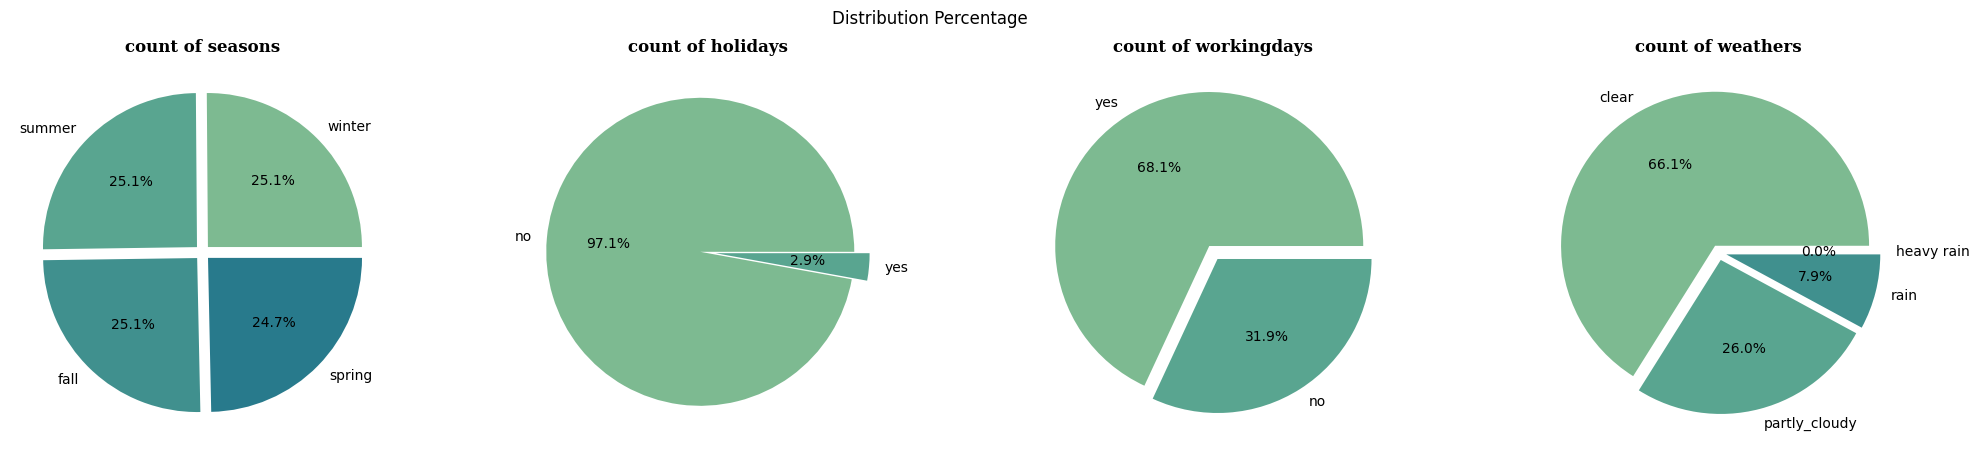

In [ ]:
plt.figure(figsize=(25,5))
plt.suptitle('Distribution Percentage')
i=1
for j in data.columns:
  if data[j].dtype=='category':
      plt.subplot(1,4,i)
      value_counts = data[j].value_counts()
      labels = value_counts.index
      plt.pie(value_counts, labels=labels, autopct='%1.1f%%', explode=[0.05]*len(value_counts), colors=sns.color_palette('crest'))
      plt.title(f'count of {j}s',fontsize=12,fontweight='bold',fontfamily='serif',backgroundcolor='white')
      i+=1

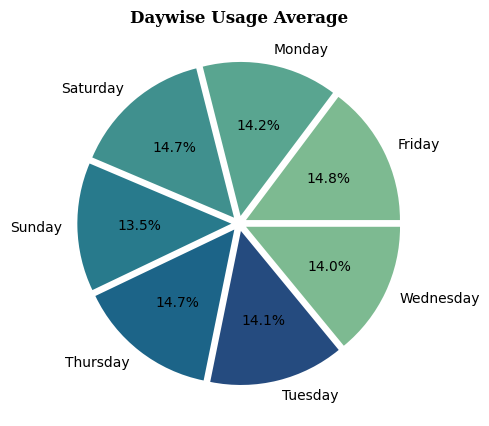

In [ ]:
plt.figure(figsize=(25,5))
day_riders_data=data.groupby('day')['total_riders'].mean().reset_index()
value_counts = day_riders_data['day']
labels = day_riders_data['day'].unique()

plt.pie(day_riders_data['total_riders'], labels=labels, autopct='%1.1f%%', explode=[0.05]*len(value_counts), colors=sns.color_palette('crest'))
plt.title('Daywise Usage Average',fontsize=12,fontweight='bold',fontfamily='serif',backgroundcolor='white')
plt.show()



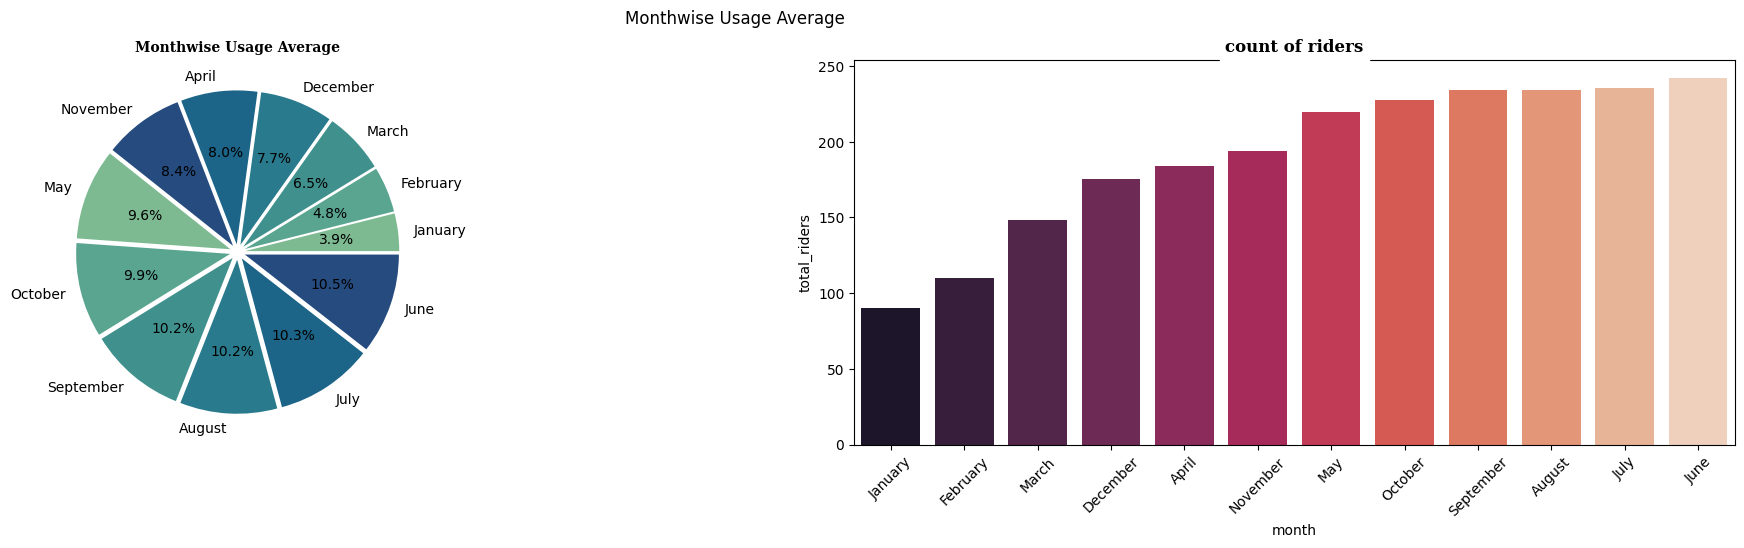

In [ ]:
plt.figure(figsize=(25,5))
plt.suptitle('Monthwise Usage Average')
month_riders_data=data.groupby('month')['total_riders'].mean().sort_values().reset_index()
value_counts = month_riders_data['month']
labels = month_riders_data['month'].unique()
plt.subplot(1,2,1)
plt.pie(month_riders_data['total_riders'], labels=labels, autopct='%1.1f%%', explode=[0.05]*len(value_counts), colors=sns.color_palette('crest'))
plt.title('Monthwise Usage Average',fontsize=10,fontweight='bold',fontfamily='serif',backgroundcolor='white')

q=plt.subplot(1,2,2)

sns.barplot(data=month_riders_data,x=month_riders_data['month'],y=month_riders_data['total_riders'],palette="rocket")

plt.title('count of riders',fontsize=12,fontweight='bold',fontfamily='serif',backgroundcolor='white')
plt.xticks(rotation=45)
warnings.filterwarnings("ignore")
plt.show()

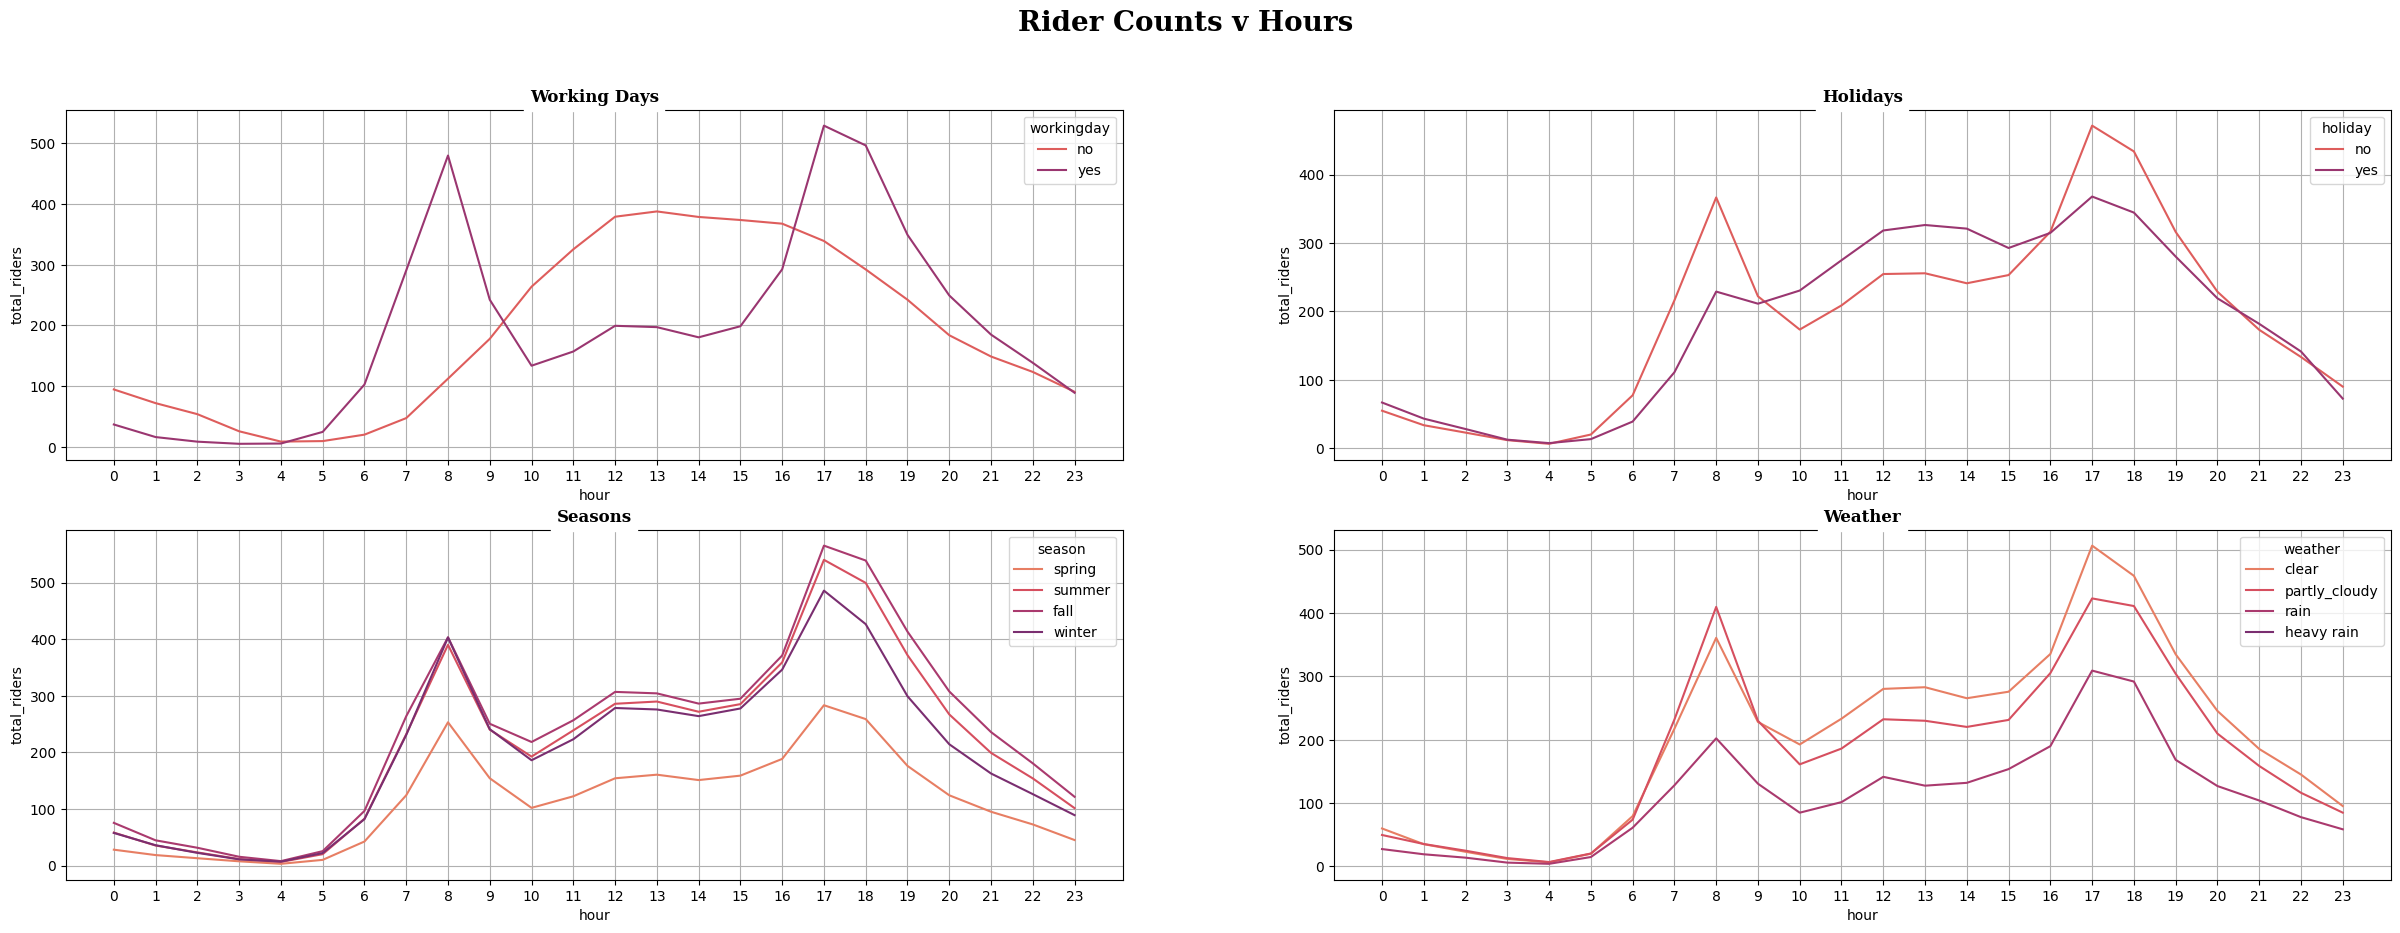

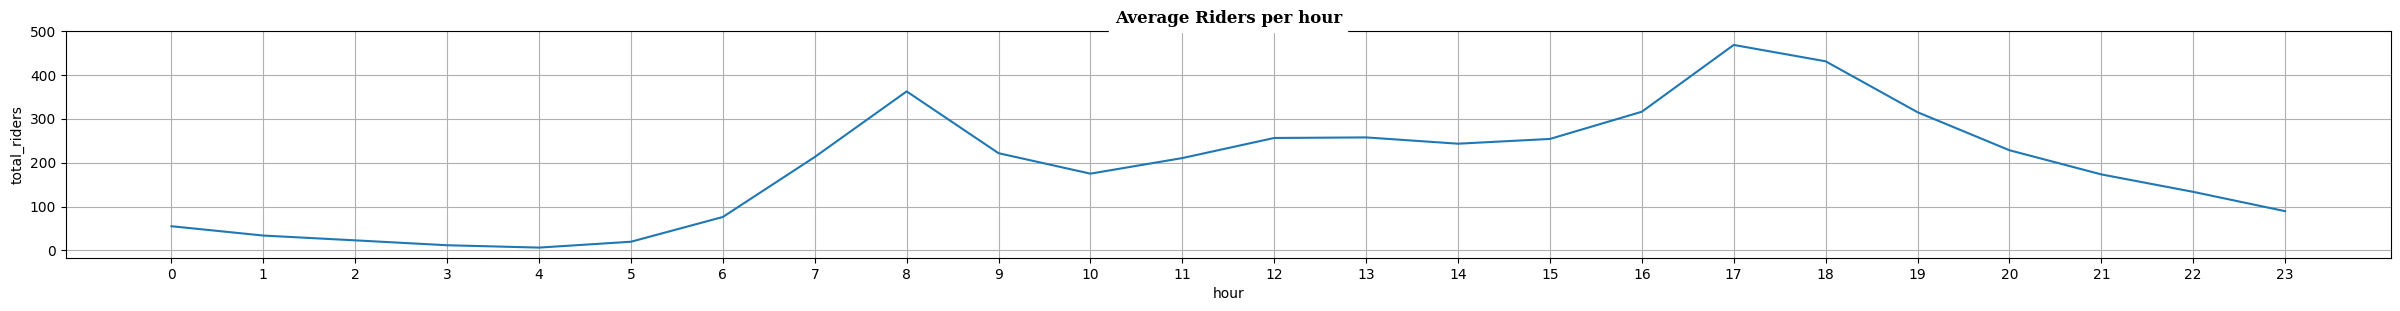

In [ ]:
plt.figure(figsize=(30,10))
plt.suptitle('Rider Counts v Hours ',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='white',color='black')

plt.subplot(2,2,1)
sns.lineplot(data=data,x='hour',y='total_riders',hue='workingday',palette='flare',ci=None)
plt.xticks(np.arange(0,24,1))
plt.grid()
plt.title('Working Days',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='white')


plt.subplot(2,2,2)
sns.lineplot(data=data,x='hour',y='total_riders',hue='holiday',palette='flare',ci=None)
plt.xticks(np.arange(0,24,1))
plt.grid()
plt.title('Holidays',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='white')

plt.subplot(2,2,3)
sns.lineplot(data=data,x='hour',y='total_riders',hue='season',palette='flare',ci=None)
plt.xticks(np.arange(0,24,1))
plt.grid()
plt.title('Seasons',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='white')

plt.subplot(2,2,4)
sns.lineplot(data=data,x='hour',y='total_riders',hue='weather',palette='flare',ci=None)
plt.xticks(np.arange(0,24,1))
plt.grid()
plt.title('Weather',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='white')

plt.figure(figsize=(30,10))
avg_riders=data.groupby('hour')['total_riders'].mean().reset_index()
plt.subplot(3,1,2)
sns.lineplot(data=avg_riders,x='hour',y='total_riders',palette='flare',ci=None)
plt.markers=True
plt.xticks(np.arange(0,24,1))
plt.yticks(np.arange(0,600,100))
plt.grid()
plt.title('Average Riders per hour',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='white')


plt.show()


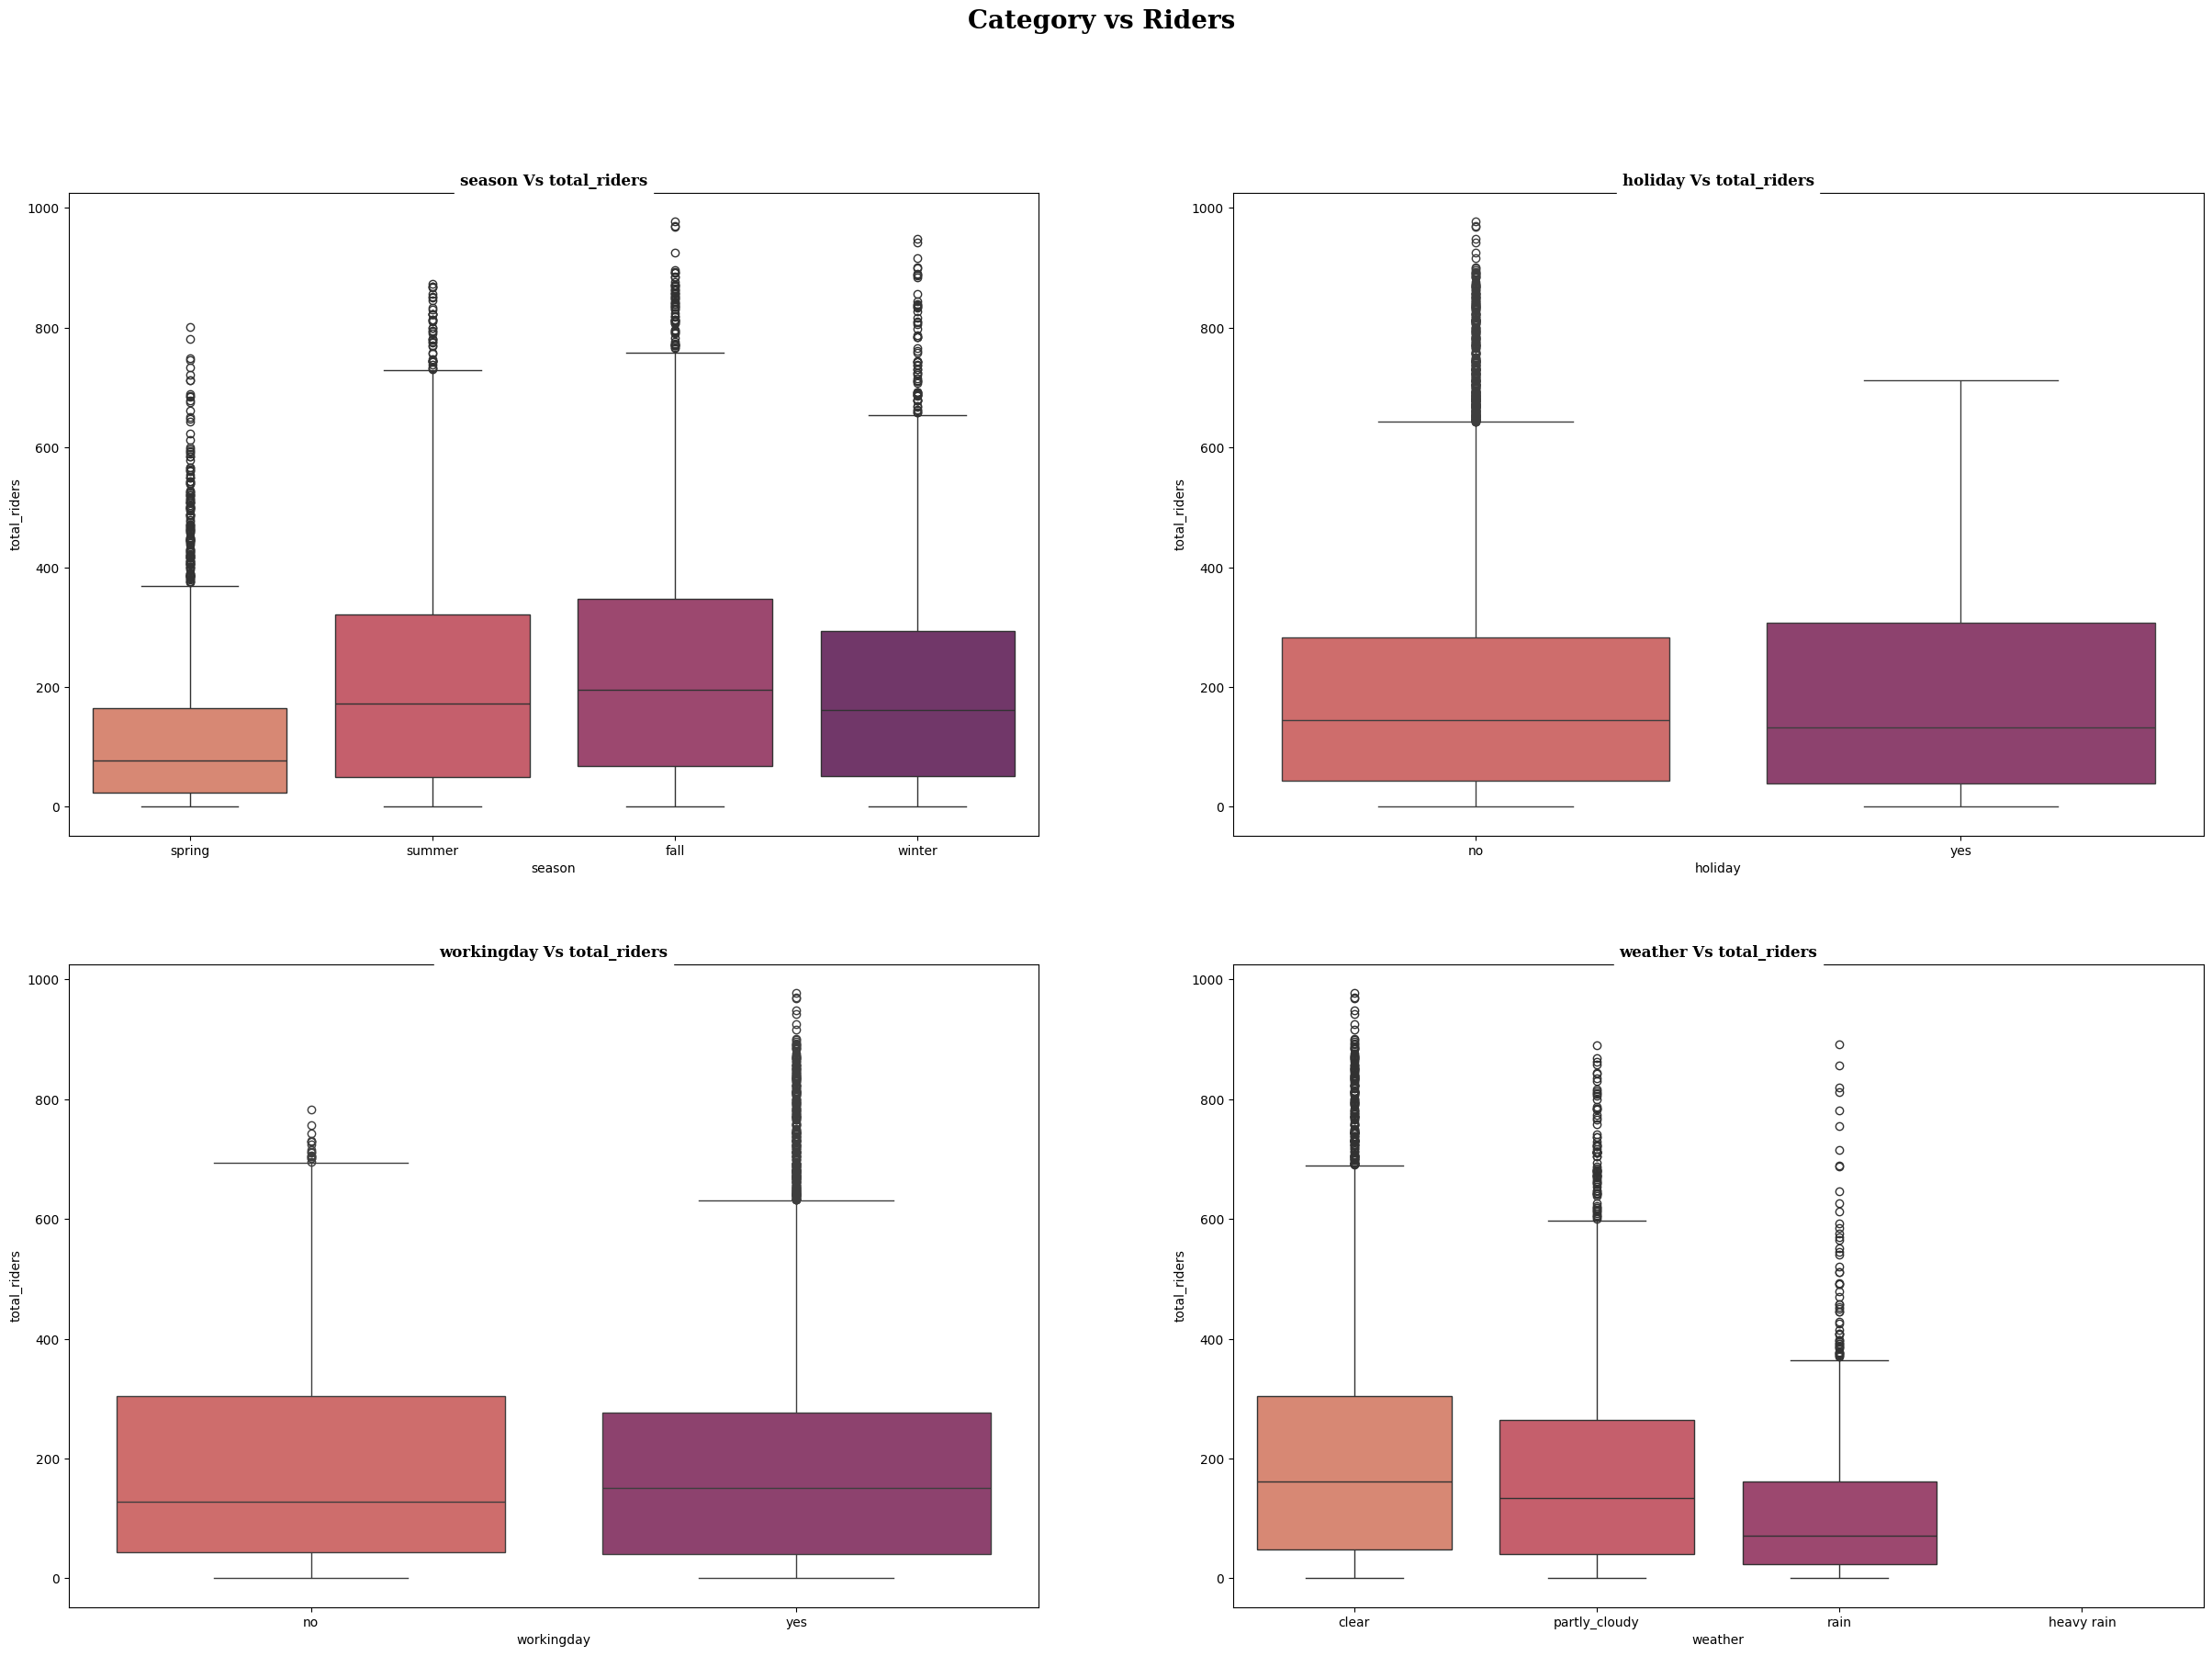

In [ ]:
categorical_col=[]
for j in data.columns:
  if data[j].dtype=='category':
    categorical_col.append(j)

plt.figure(figsize=(30,20))
plt.suptitle('Category vs Riders',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='white',color='black')

for i in range(len(categorical_col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=data,x=categorical_col[i],y='total_riders',palette='flare')
    plt.title(f'{categorical_col[i]} Vs total_riders',fontsize=12,fontweight='bold',fontfamily='serif',backgroundcolor='white')

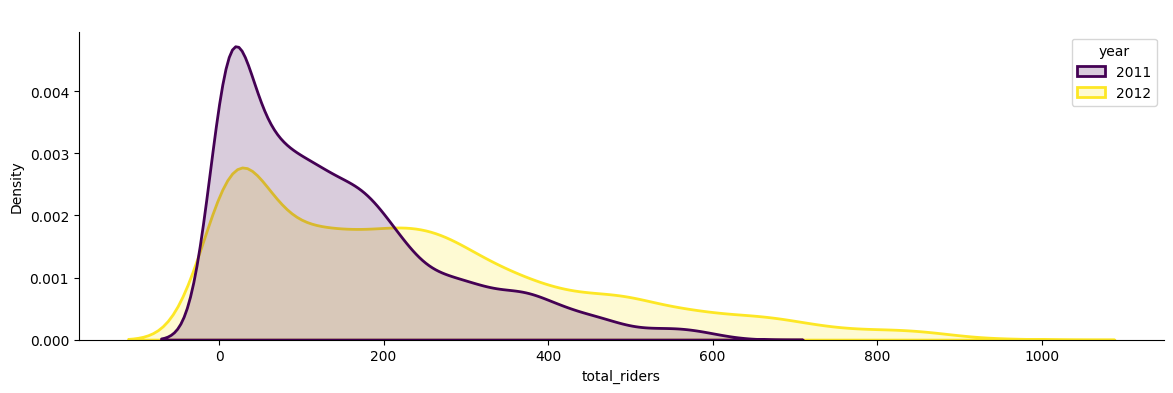

In [ ]:
plt.figure(figsize = (14,4))
sns.kdeplot(data=data, x="total_riders", hue="year", fill=True, common_norm=False,  palette="viridis", alpha=.2, linewidth=2)
plt.title("Kernel Density Estimations of riders per year",fontsize = 14,fontfamily='serif',fontweight='bold',color='w')
sns.despine()
plt.show()

####**Numerical Analysis**

Text(0.5, 1.0, 'Distribution of total_riders')

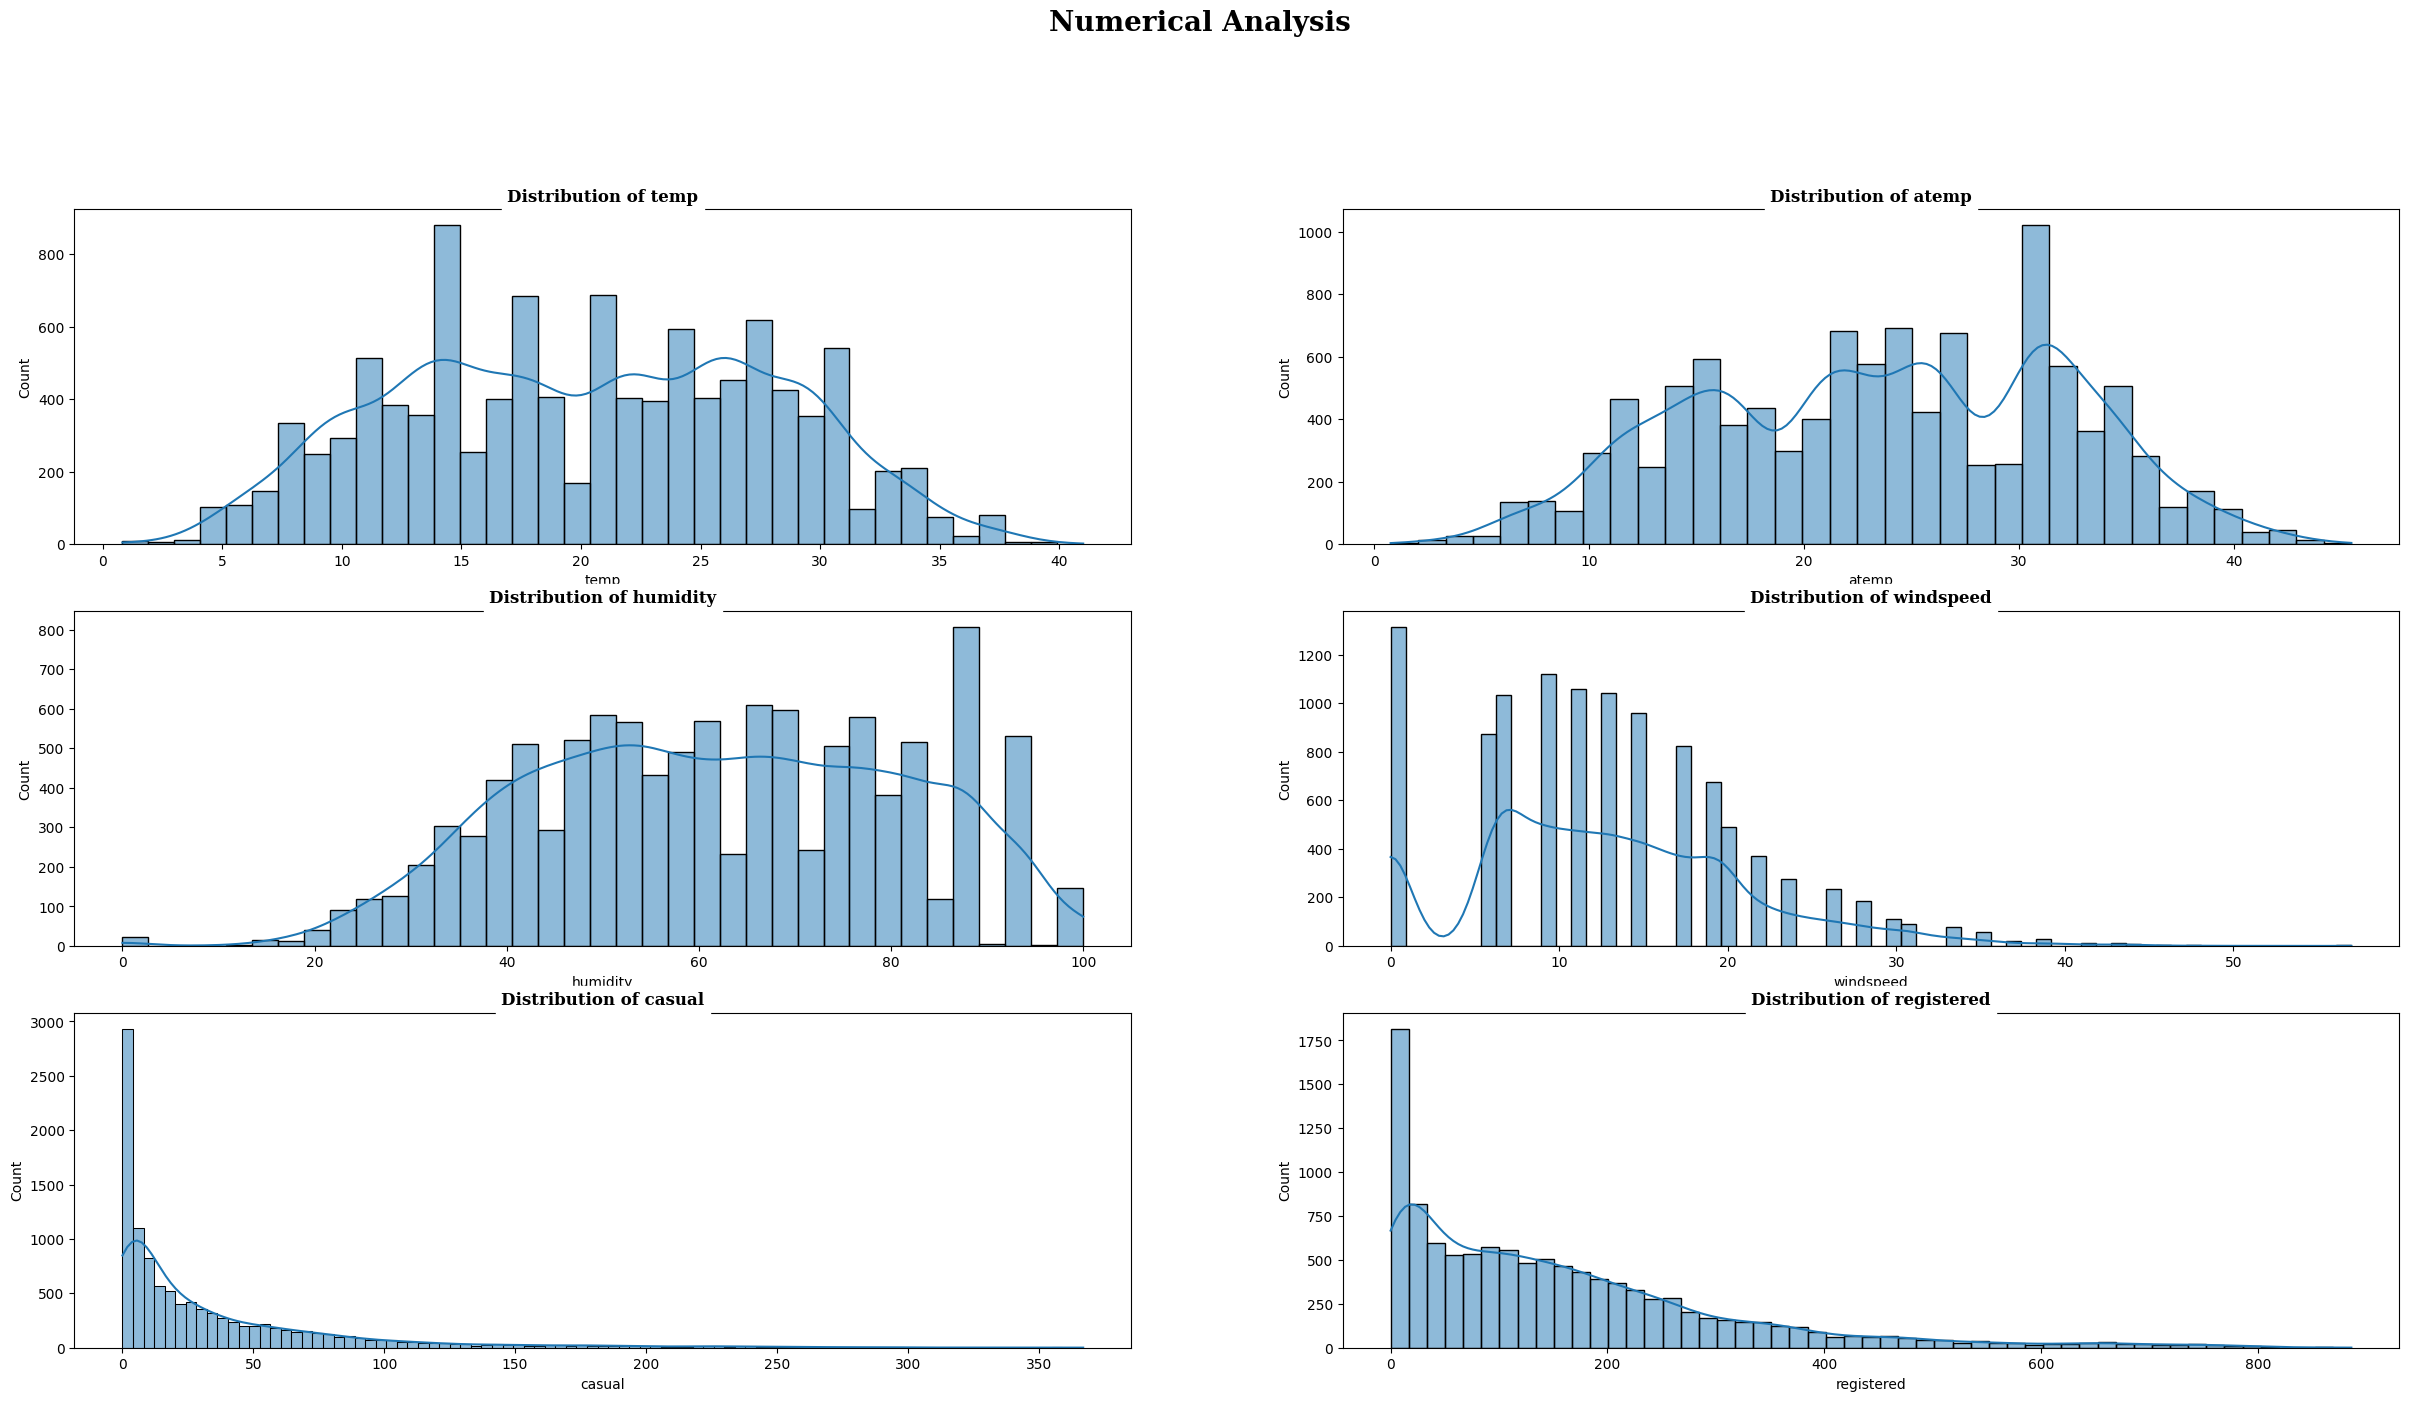

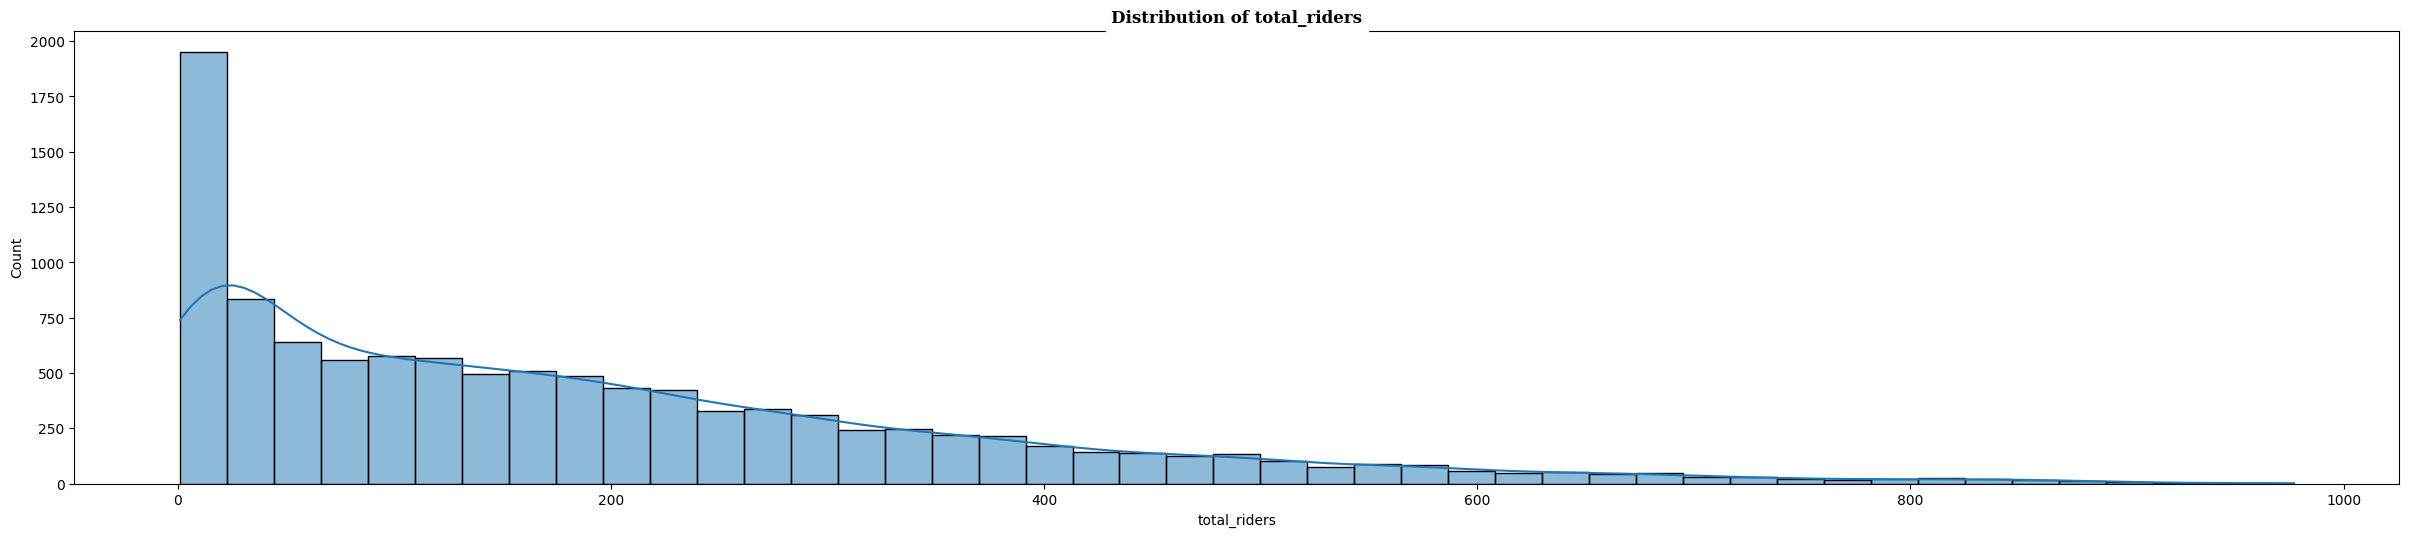

In [ ]:
plt.figure(figsize=(30,20))
plt.suptitle('Numerical Analysis',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='white',color='black')
numerical_cols=['temp','atemp','humidity','windspeed','casual','registered']

i=1
for j in numerical_cols:
  plt.subplot(4,2,i)
  sns.histplot(data=data,x=j,kde=True,palette='flare')
  plt.title(f'Distribution of {j}',fontsize=12,fontweight='bold',fontfamily='serif',backgroundcolor='white')
  i+=1

plt.figure(figsize=(30,20))
plt.subplot(3,1,2)
sns.histplot(data=data,x='total_riders',kde=True,palette='flare')
plt.title(f'Distribution of total_riders',fontsize=12,fontweight='bold',fontfamily='serif',backgroundcolor='white')

In [ ]:
data.shape

(10885, 16)

#### **Outlier detection and handling**

In [ ]:
num_cols=['temp','atemp','humidity','windspeed','casual','registered','total_riders']

num_cols

['temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total_riders']

In [ ]:

iqr_df=pd.DataFrame(columns=['col_name','lower_bound','upper_bound','IQR'])
for i in range(len(num_cols)):

  num_data1=data[data[num_cols[i]]>0]
  print(f'{num_cols[i]}')
  min=num_data1[num_cols[i]].min()
  max=num_data1[num_cols[i]].max()
  print(f'min:{min} max:{max}')
  Q1=num_data1[num_cols[i]].quantile(0.25)
  Q2=num_data1[num_cols[i]].median()
  Q3=num_data1[num_cols[i]].quantile(0.75)
  IQR=round(Q3-Q1,2)
  lower_bound=round(Q1-(1.5*IQR),2)
  upper_bound=round(Q3+(1.5*IQR),2)
  temp_df=pd.DataFrame({'col_name':[num_cols[i]],'lower_bound':[lower_bound],'upper_bound':[upper_bound],'IQR':[IQR]})
  iqr_df=pd.concat([iqr_df,temp_df])

  print(f'Q1:{Q1}  Q3:{Q3}')
  print(f'median:{Q2}')
  print(f'lower_bound:{lower_bound} upper_bound:{upper_bound}')
  print(f'IQR:{IQR}')
  print('----------------------------------------------------')
  print()

temp
min:0.82 max:41.0
Q1:13.94  Q3:26.24
median:20.5
lower_bound:-4.51 upper_bound:44.69
IQR:12.3
----------------------------------------------------

atemp
min:0.76 max:45.455
Q1:16.665  Q3:31.06
median:24.24
lower_bound:-4.94 upper_bound:52.66
IQR:14.4
----------------------------------------------------

humidity
min:8 max:100
Q1:47.0  Q3:77.0
median:62.0
lower_bound:2.0 upper_bound:122.0
IQR:30.0
----------------------------------------------------

windspeed
min:6.0032 max:56.9969
Q1:8.9981  Q3:19.0012
median:12.998
lower_bound:-6.0 upper_bound:34.0
IQR:10.0
----------------------------------------------------

casual
min:1 max:367
Q1:6.0  Q3:53.0
median:20.0
lower_bound:-64.5 upper_bound:123.5
IQR:47.0
----------------------------------------------------

registered
min:1 max:886
Q1:36.0  Q3:223.0
median:118.5
lower_bound:-244.5 upper_bound:503.5
IQR:187.0
----------------------------------------------------

total_riders
min:1 max:977
Q1:42.0  Q3:284.0
median:145.0
lower_bound

In [ ]:
iqr_df.reset_index(drop=True,inplace=True)
iqr_df

col_name  lower_bound  upper_bound    IQR
0          temp        -4.51        44.69   12.3
1         atemp        -4.94        52.66   14.4
2      humidity         2.00       122.00   30.0
3     windspeed        -6.00        34.00   10.0
4        casual       -64.50       123.50   47.0
5    registered      -244.50       503.50  187.0
6  total_riders      -321.00       647.00  242.0

### **2. Establishing relationship between dependent and independent variables**

In [ ]:
num_cols=['temp','atemp','humidity','windspeed','casual','registered','total_riders','hour']

In [ ]:
num_data=data[num_cols].reset_index(drop=True)
num_data.head()

temp   atemp  humidity  windspeed  casual  registered  total_riders  hour
0  9.84  14.395        81        0.0       3          13            16     0
1  9.02  13.635        80        0.0       8          32            40     1
2  9.02  13.635        80        0.0       5          27            32     2
3  9.84  14.395        75        0.0       3          10            13     3
4  9.84  14.395        75        0.0       0           1             1     4

In [ ]:
num_data.corr()

temp     atemp  humidity  windspeed    casual  registered  \
temp          1.000000  0.984945 -0.064783  -0.017973  0.467071    0.318608   
atemp         0.984945  1.000000 -0.043376  -0.057591  0.462039    0.314668   
humidity     -0.064783 -0.043376  1.000000  -0.318544 -0.348149   -0.265479   
windspeed    -0.017973 -0.057591 -0.318544   1.000000  0.092235    0.091056   
casual        0.467071  0.462039 -0.348149   0.092235  1.000000    0.497259   
registered    0.318608  0.314668 -0.265479   0.091056  0.497259    1.000000   
total_riders  0.394476  0.389802 -0.317377   0.101361  0.690417    0.970949   
hour          0.145584  0.140486 -0.278150   0.146713  0.302114    0.380554   

              total_riders      hour  
temp              0.394476  0.145584  
atemp             0.389802  0.140486  
humidity         -0.317377 -0.278150  
windspeed         0.101361  0.146713  
casual            0.690417  0.302114  
registered        0.970949  0.380554  
total_riders      1.000000  0.400631  
hour              0.400631  1.000000

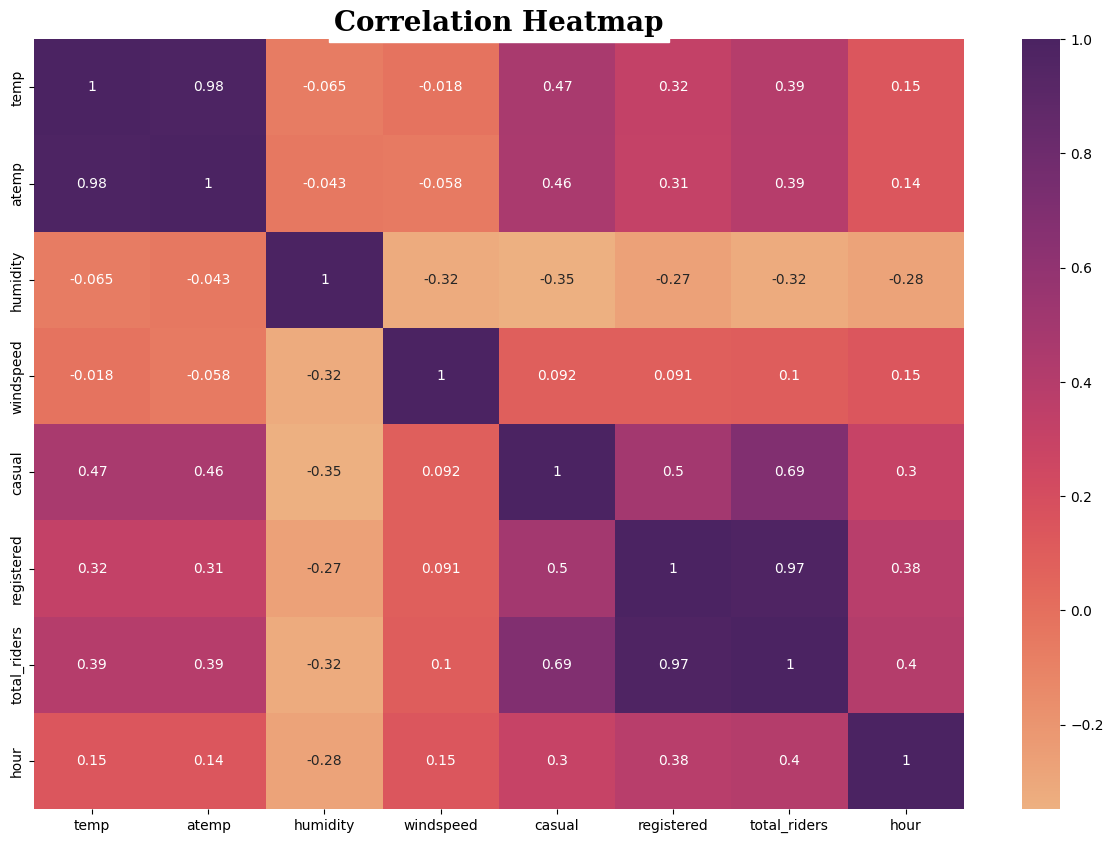

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(num_data.corr(),annot=True,cmap='flare')
plt.title('Correlation Heatmap',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='white',color='black')
plt.show()


<Figure size 1500x1000 with 0 Axes>

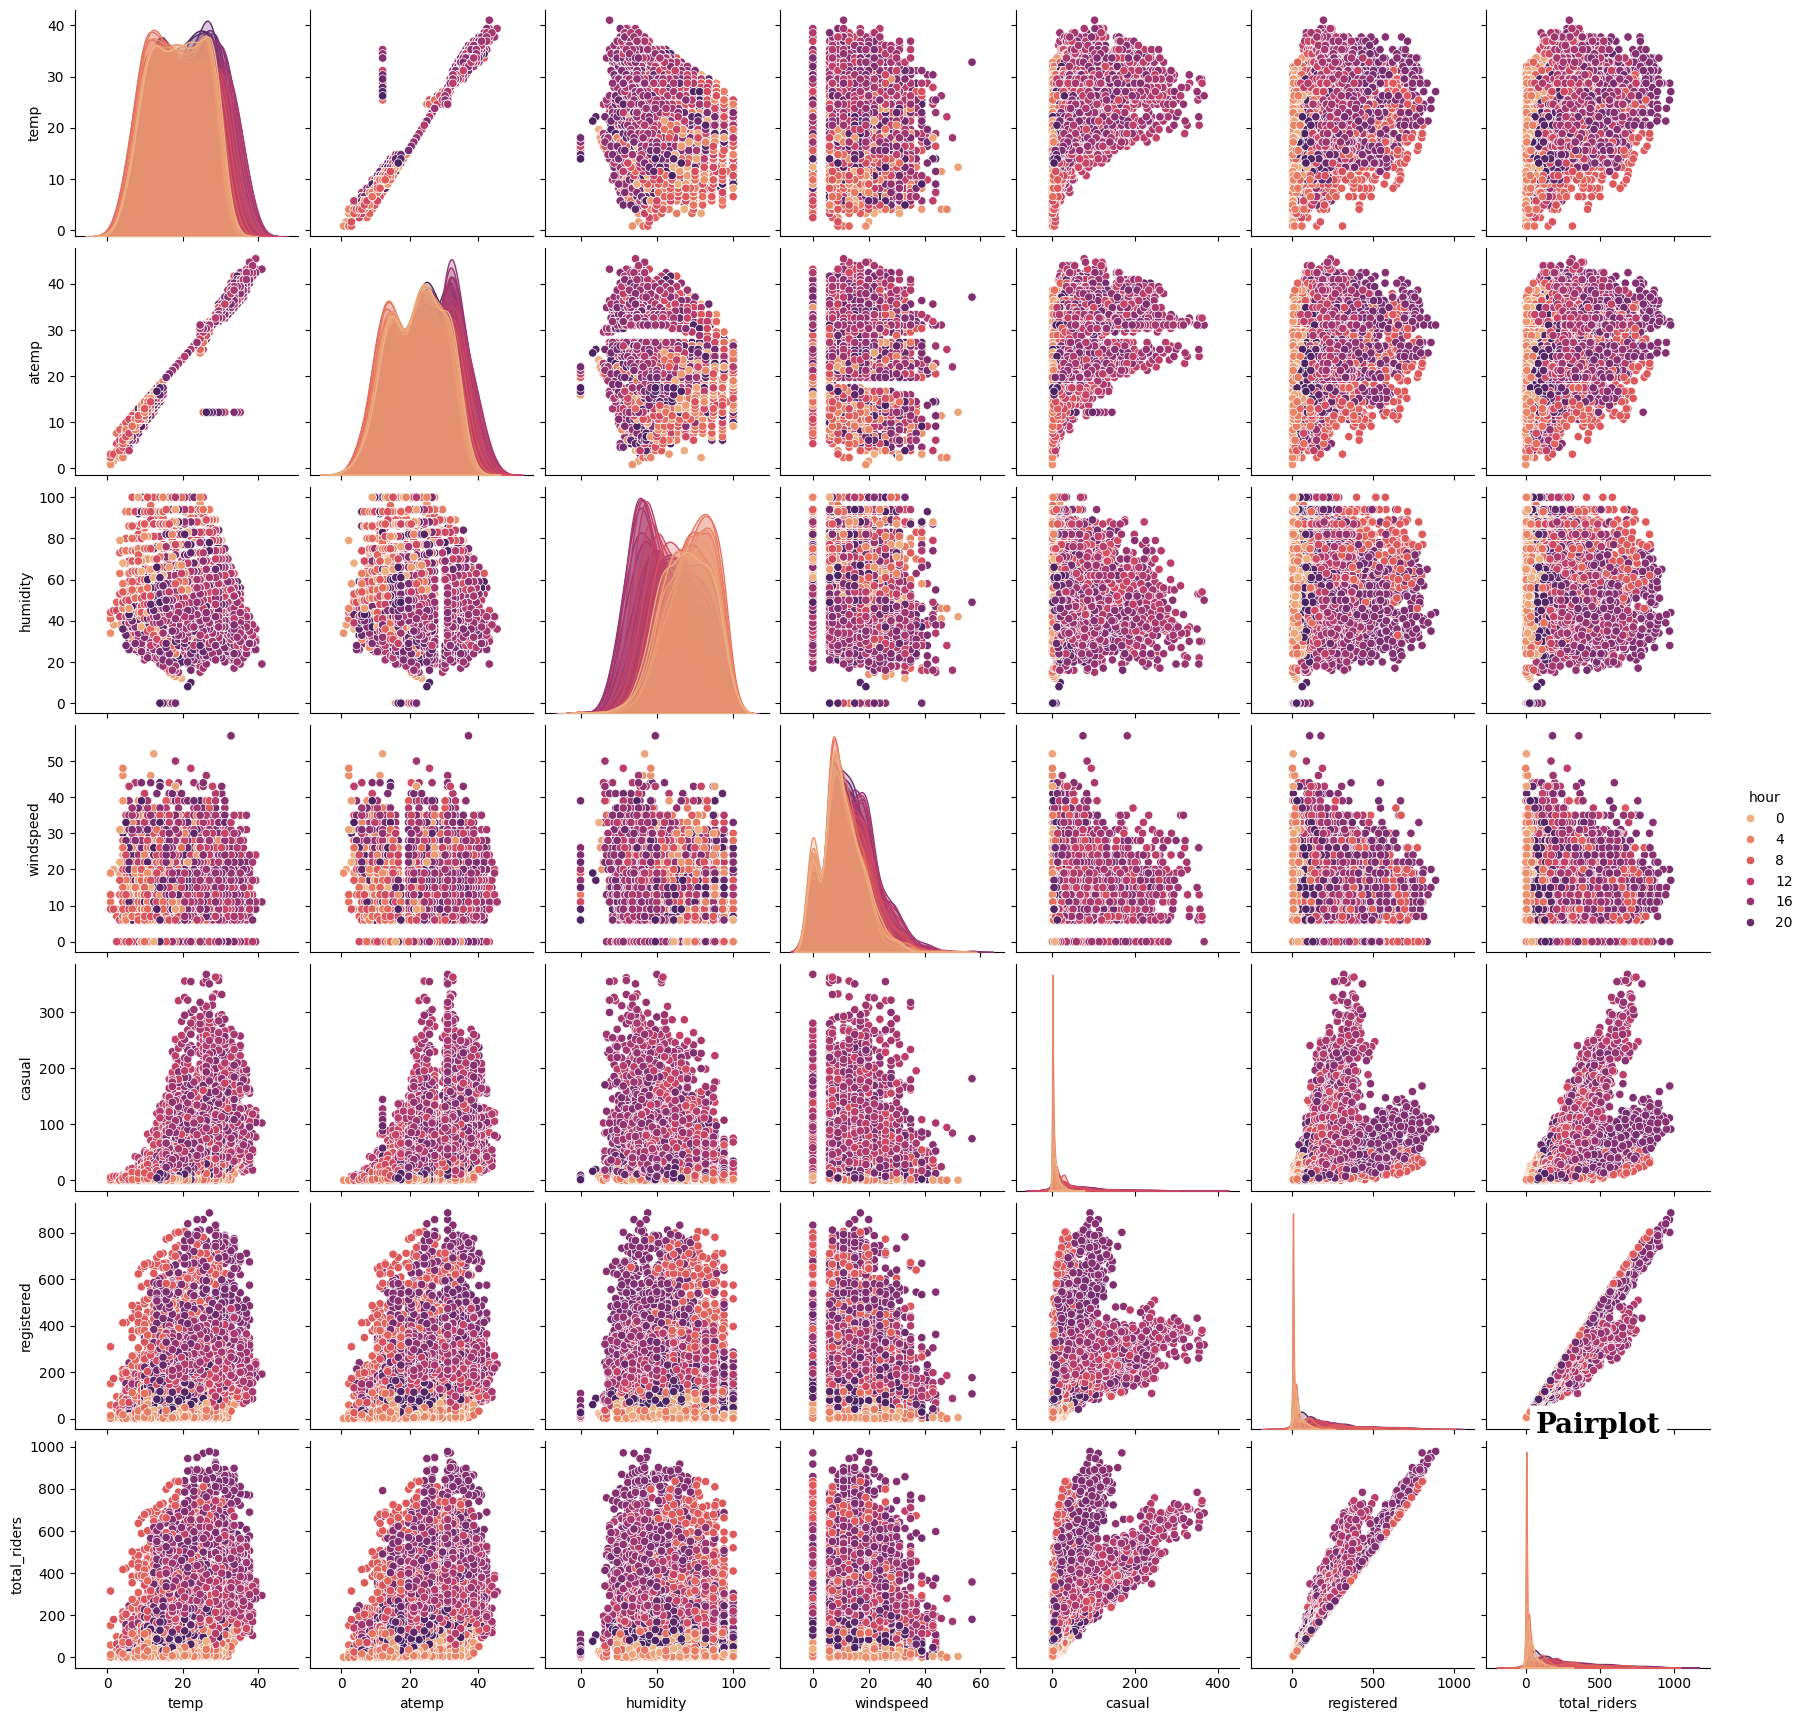

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(data=num_data,hue='hour',palette='flare')
plt.title('Pairplot',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='white',color='black')
plt.show()

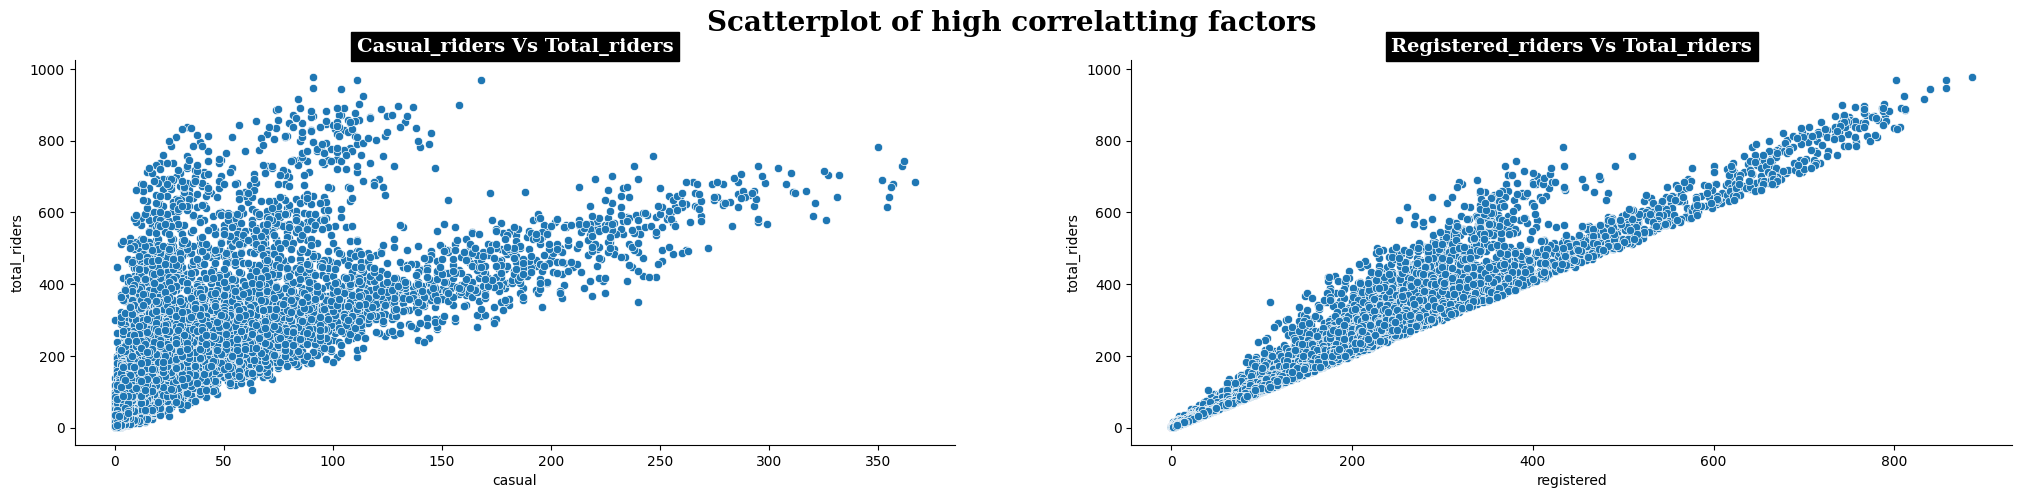

In [ ]:
plt.figure(figsize=(25,5))
plt.suptitle('Scatterplot of high correlatting factors',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='white',color='black')

plt.subplot(1,2,1)
sns.scatterplot(data=data, x='casual', y='total_riders')
plt.title('Casual_riders Vs Total_riders',fontfamily='serif',fontweight='bold',fontsize=14,color='w',backgroundcolor='black')

plt.subplot(1,2,2)
sns.scatterplot(data=data, x='registered', y='total_riders')
plt.title('Registered_riders Vs Total_riders',fontfamily='serif',fontweight='bold',fontsize=14,color='w',backgroundcolor='black')

sns.despine()
plt.show()

####**Inferences**
- Temperature and feeling temperature exhibit a strong positive correlation.
- Registered Users and Total_riders exhibit a strong positive correlation as well.
- Limited correlation observed between weather-related factors and bike rental counts.

### **3. Check if there are any significant difference between no of bike rides on weekdays and weekends**

In [ ]:
H0='There is no significant difference between no of bike rides on weekdays and weekends'
H1='There is significant difference between no of bike rides on weekdays and weekends'
alpha=0.05

In [ ]:
weekday_data=data[data['workingday'].isin([1])]['total_riders']
weekend_data=data[data['workingday'].isin([0])]['total_riders']

####**T-test**

Since we have two samples here we will use 2-Sample Independent test to check if our hypothesis hold true at 5% significance level

In [ ]:
t_stat,p_value=ttest_ind(weekday_data,weekend_data)
print("test statistic:",round(t_stat,2),"p_value:",round(p_value,2))

test statistic: nan p_value: nan


In [ ]:
if p_value<alpha:
  print(H0)
else:
  print(H1)

There is significant difference between no of bike rides on weekdays and weekends


####**Inference**

We can say that rent for YULU Bikes are significantly different on weekends when compared to weekdays with a 95% confidence.

### **4. Check if demand of bicycles on rent is the same for different weather coditions**

In [ ]:
H0='Demand of bicycles on rent is the same for different weather coditions'
H1='Demand of bicycles on rent is not the same for different weather coditions'
alpha=0.05

In [ ]:
data['weather'].unique()

['clear', 'partly_cloudy', 'rain']
Categories (4, object): ['clear', 'partly_cloudy', 'rain', 'heavy rain']

In [ ]:
weather1_data=data[data['weather'].isin(['clear'])]['total_riders']
weather2_data=data[data['weather'].isin(['partly_cloudy'])]['total_riders']
weather3_data=data[data['weather'].isin(['rain'])]['total_riders']


In [ ]:
for i in [weather1_data,weather2_data,weather3_data]:
  print(i.count())

7192
2834
859


**Checking assumptions of One-Way Anova**

We shall check if our data meets the requirements of **Normal Distribution** and **Similar Variance** before we try and check if our hypothesis holds true

####**Normality Check using QQ-plots**

<Figure size 1500x1000 with 0 Axes>

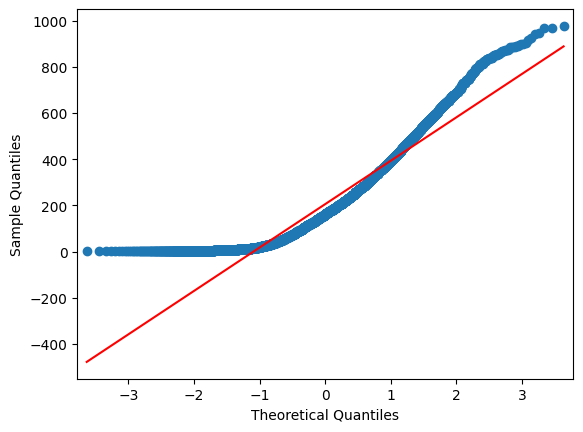

In [ ]:
plt.figure(figsize=(15,10))
sm.qqplot(weather1_data,dist=norm,line="s")
plt.show()


<Figure size 1500x1000 with 0 Axes>

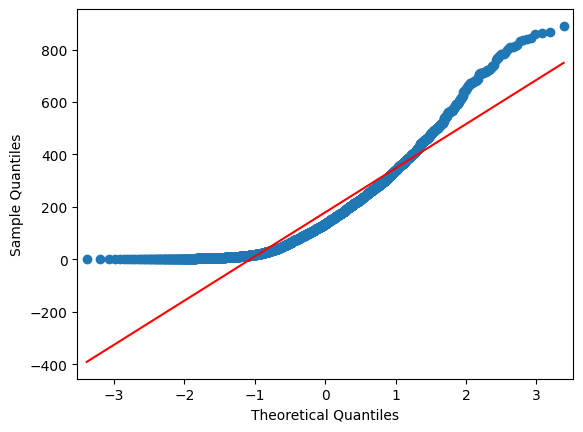

In [ ]:
plt.figure(figsize=(15,10))
sm.qqplot(weather2_data,dist=norm,line="s")
plt.show()

<Figure size 1500x1000 with 0 Axes>

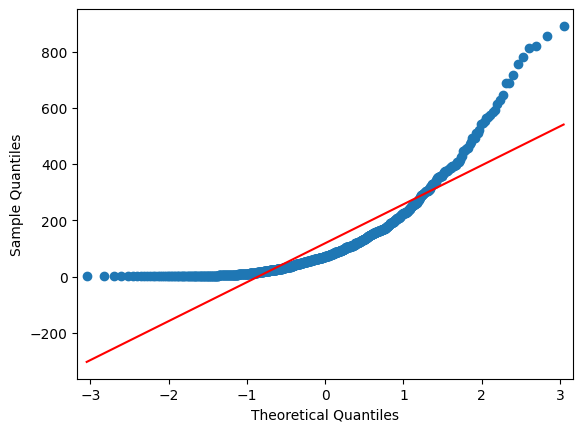

In [ ]:
plt.figure(figsize=(15,10))
sm.qqplot(weather3_data,dist=norm,line="s")
plt.show()

####**Noramilty check using Shapiro-Wilk Test**

In [ ]:
wstat1,wpvalue1=shapiro(weather1_data)
wstat2,wpvalue2=shapiro(weather2_data)
wstat3,wpvalue3=shapiro(weather3_data)

In [ ]:
for i in [wpvalue1,wpvalue2,wpvalue3]:
  if i<0.05:
    print("Not Normal")
  else:
    print("Normal")

Not Normal
Not Normal
Not Normal


####**Variance check using Levene's test**

In [ ]:
lstat1,lpvalue1=levene(weather1_data,weather2_data,weather3_data)

In [ ]:
if lpvalue1<0.05:
  print("Variance is Not Equal")
else:
  print("Variance is Equal")

Variance is Not Equal


It is clear that the data doesn't meet the assumptions set for One-way Anova, Hence we are going to use Kruskal-Walli's test to check for p-value and test statistic




####**Kruskal-Wallis test**

In [ ]:
kw_stat,kw_pvalue=kruskal(weather1_data,weather2_data,weather3_data)
print("test statistic:",kw_stat,"p_value:",kw_pvalue,2)

test statistic: 204.95566833068537 p_value: 3.122066178659941e-45 2


In [ ]:
if kw_pvalue<alpha:
  print(H0)
else:
  print(H1)

Demand of bicycles on rent is the same for different weather coditions


####**Inference**
We can say that rent for YULU Bikes are same for different weather conditions with a 95% confidence.

### **5. Check if demand of bicycles on rent is the same for different seasons**

In [ ]:
H0='Demand of bicycles on rent is the same for different seasons'
H1='Demand of bicycles on rent is not the same for different seasons'
alpha=0.05

In [ ]:
data['season'].unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

In [ ]:
season1_data=data[data['season'].isin(['spring'])]['total_riders']
season2_data=data[data['season'].isin(['summer'])]['total_riders']
season3_data=data[data['season'].isin(['fall'])]['total_riders']
season4_data=data[data['season'].isin(['winter'])]['total_riders']

**Checking assumptions of One-Way Anova**

We shall check if our data meets the requirements of **Normal Distribution** and **Similar Variance** before we try and check if our hypothesis holds true

####**Normality Check using QQ-Plots**

<Figure size 1500x1000 with 0 Axes>

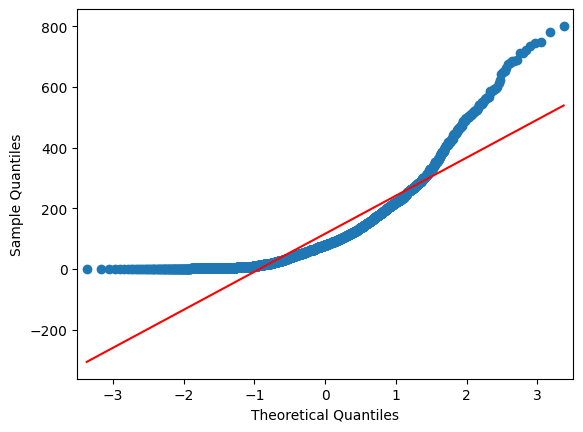

In [ ]:
plt.figure(figsize=(15,10))
sm.qqplot(season1_data,dist=norm,line="s")
plt.show()

<Figure size 1500x1000 with 0 Axes>

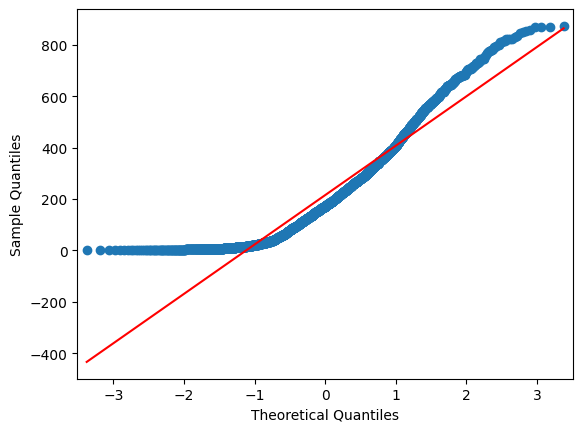

In [ ]:
plt.figure(figsize=(15,10))
sm.qqplot(season2_data,dist=norm,line="s")
plt.show()

<Figure size 1500x1000 with 0 Axes>

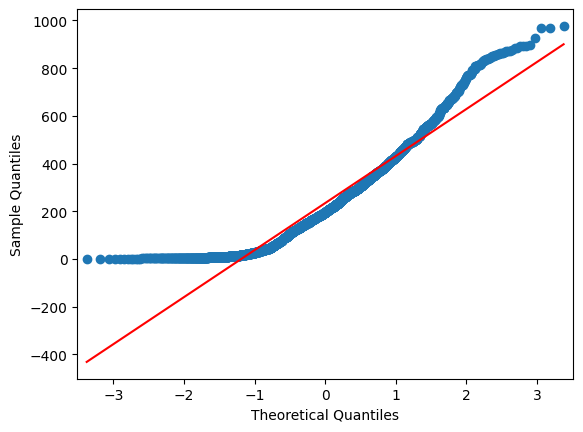

In [ ]:
plt.figure(figsize=(15,10))
sm.qqplot(season3_data,dist=norm,line="s")
plt.show()

<Figure size 1500x1000 with 0 Axes>

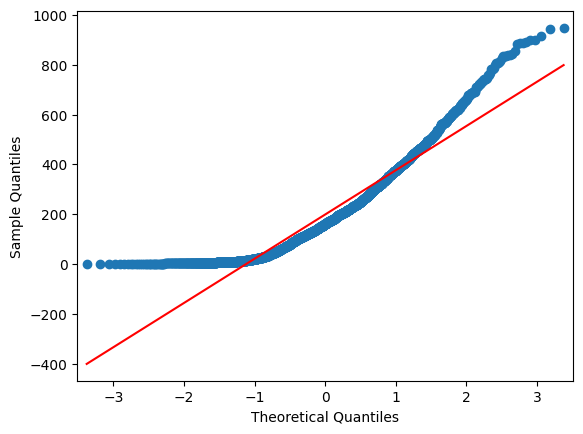

In [ ]:
plt.figure(figsize=(15,10))
sm.qqplot(season4_data,dist=norm,line="s")
plt.show()

####**Noramilty check using Shapiro-Wilk Test**

In [ ]:
s_stat1,spvalue1=shapiro(season1_data)
s_stat2,spvalue2=shapiro(season2_data)
s_stat3,spvalue3=shapiro(season3_data)
s_stat4,spvalue4=shapiro(season4_data)

In [ ]:
for i in [spvalue1,spvalue2,spvalue3,spvalue4]:
  if i<0.05:
    print("Not Normal")
  else:
    print("Normal")

Not Normal
Not Normal
Not Normal
Not Normal


####**Variance check using Levene's Test**

In [ ]:
l_stat,lp_value=levene(season1_data,season2_data,season3_data,season4_data)


In [ ]:
if lp_value<0.05:
  print("Variance is Not Equal")
else:
  print("Variance is Equal")

Variance is Not Equal


It is clear that the data doesn't meet the assumptions set for One-way Anova, Hence we are going to use Kruskal-Walli's test to check for p-value and test statistic

####**Kruskal-Wallis test**

In [ ]:
kw_stat,kw_pvalue=kruskal(season1_data,season2_data,season3_data,season4_data)
print("test statistic:",kw_stat,"p_value:",kw_pvalue)

test statistic: 699.8821417617874 p_value: 2.2263612957303657e-151


In [ ]:
if kw_pvalue<alpha:
  print(H0)
else:
  print(H1)

Demand of bicycles on rent is the same for different seasons


####**Inference**
We can say that rent for YULU Bikes are same during different seasons with a 95% confidence.

### **6. Check if weather conditions are significantly different during different seasons**

In [ ]:
H0='Weather conditions are not significantly different during different seasons'
H1='Weather conditions are significantly different during different seasons'
alpha=0.05

In [ ]:
weather_season_data=pd.crosstab(data['weather'],data['season'])

In [ ]:
weather_season_data

season         spring  summer  fall  winter
weather                                    
clear            1759    1801  1930    1702
partly_cloudy     715     708   604     807
rain              211     224   199     225

####**Chi-Square Contingency Test**

In [ ]:
chi_stat, p_value, df, exp_freq = chi2_contingency(weather_season_data)

print("chi_stat:",round(chi_stat,2))
print("p_value:",(p_value))
print("degree of freedom:",df)
print("exp_freq:\n",np.round(exp_freq),2)

chi_stat: 46.1
p_value: 2.8260014509929403e-08
degree of freedom: 6
exp_freq:
 [[1774. 1806. 1806. 1806.]
 [ 699.  712.  712.  712.]
 [ 212.  216.  216.  216.]] 2


In [ ]:
if p_value<alpha:
  print(H0)
else:
  print(H1)

Weather conditions are not significantly different during different seasons


####**Inference**
We can say that the weather conditions are different from other seasons with a 95% confidence.

### **Business Insights**


*   Seasonality:-    
      Bike rentals are on the highest demand during summer while they are in less demand during winter conditions

*   Weather:-  
      As the weather conditions change from clear towards rain the rentals drop gradually

*   Temperature:-   
      It can be said that higher temperatures lead to more usage of rental bikes

*   Time of Day:-   
      The highest rentals are in early business hours and end of the business day indicating that people could be using YULU bikes for their daily commute to and from their workplace

*   Types of Users:-  
      There is a 80:20 ratio of registered users vs casual users

*   Peak months:-
      Users prefer to use YULu bikes most in the May-October period of the year

*   Statistical Significance with 95% confidence:-

    Using different Hypothesis tests we can conclude that
    
    *  Weekends and weekdays have a differnce in rental requirements by customers
    *   There is no difference in requirements of renatls in different weather conditions
    *   There is no difference in requirements of rentals as the seasons change






### **Business Recommendations**

        

  *   Time based strategies:-   
        * Slash prices during non-peak hours
        * Make more bikes available during peak hours

  *   User conversion:-
        * Additional benefits for registered members like points reward system on every usage
        * Casual users can be given a discount on their rides if they register

  *   Weekday promotions:-
        * We know that majority of people use YULU bikes on weekdays to commute to and from workplace, they can be given a subscription model to ensure maximum usage of resources
        * YULU bikes can be placed strategically nearer to the places with most footfalls on weekends making it convenient and easy to access for users

  *   Social media campaigns:-
      * Users can be included in social media campaigns where they get rewarded on their accounts for sharing their YULU ride snaps & detailing their
      experiences
      * People with most hours clocked on the bikes can be announced on social media accounts once a month and rewarded with free rides

  *   Maintenance:-
      * Use the time frame where there is less demand of YULU bikes for their service and upkeep ensuring less hassle for customers
